In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [8]:
stock_price = "/content/2) Stock Prices Data Set.csv"
data = pd.read_csv(stock_price)
print(data.head())

  symbol        date      open      high       low     close      volume
0    AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943.0
1   AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957.0
2    AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711.0
3   ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061.0
4    ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391.0


In [12]:
data['date'] = pd.to_datetime(data['date'])


In [13]:
stock = data[data['symbol'] == 'AAPL'].copy()

In [14]:
stock = stock.sort_values('date')
stock.set_index('date', inplace=True)


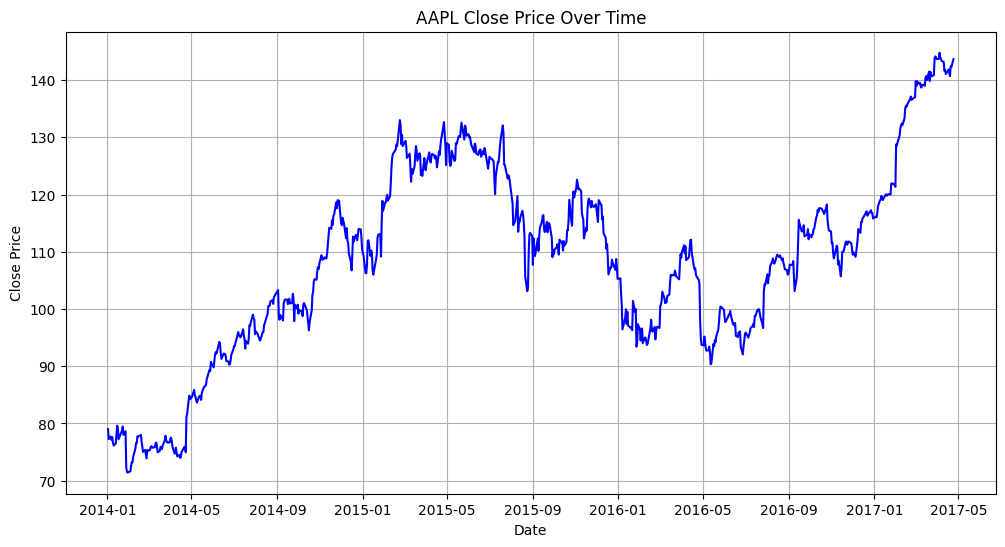

In [15]:
plt.figure(figsize=(12,6))
plt.plot(stock['close'], color='blue')
plt.title("AAPL Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

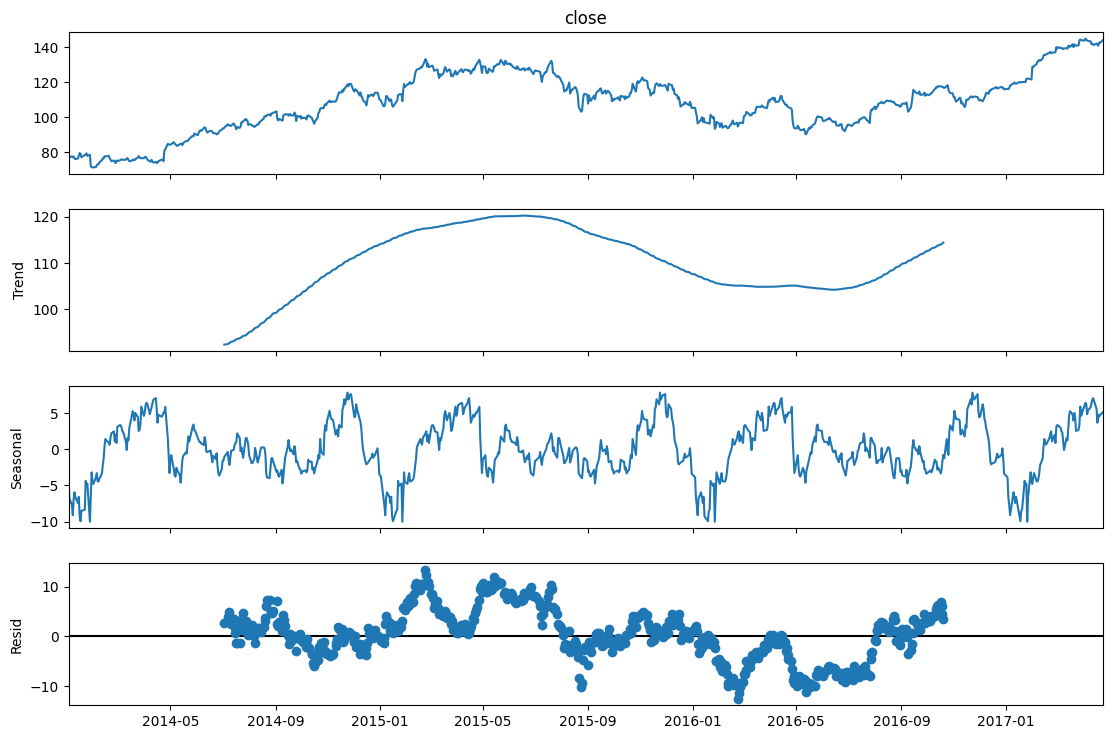

In [19]:
decomposition = seasonal_decompose(stock['close'], model='additive', period=252)  # ~252 trading days/year

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()


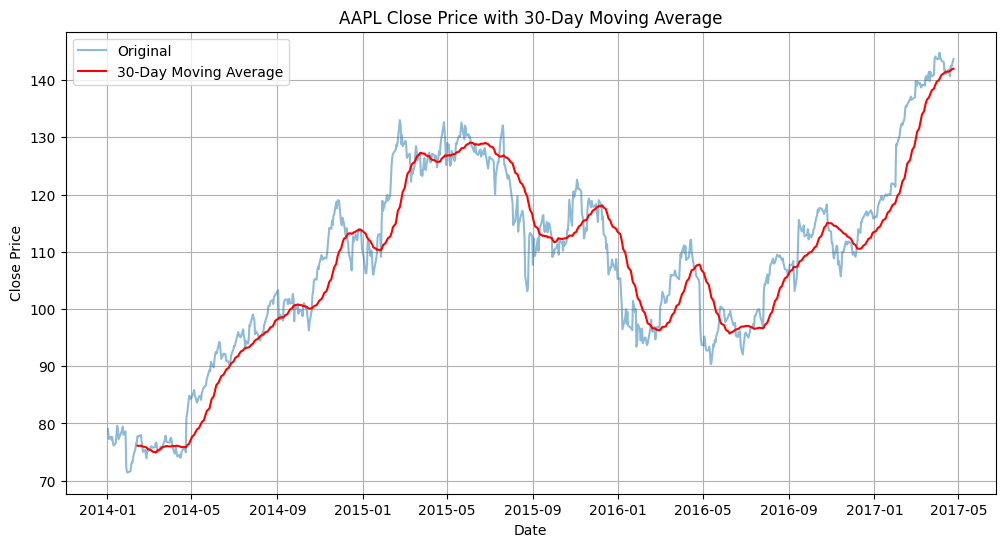

In [20]:
stock['30_day_MA'] = stock['close'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(stock['close'], label='Original', alpha=0.5)
plt.plot(stock['30_day_MA'], label='30-Day Moving Average', color='red')
plt.title("AAPL Close Price with 30-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()
